In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Cars/cars.csv')
brands = data['manufacturer_name'].unique()

data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


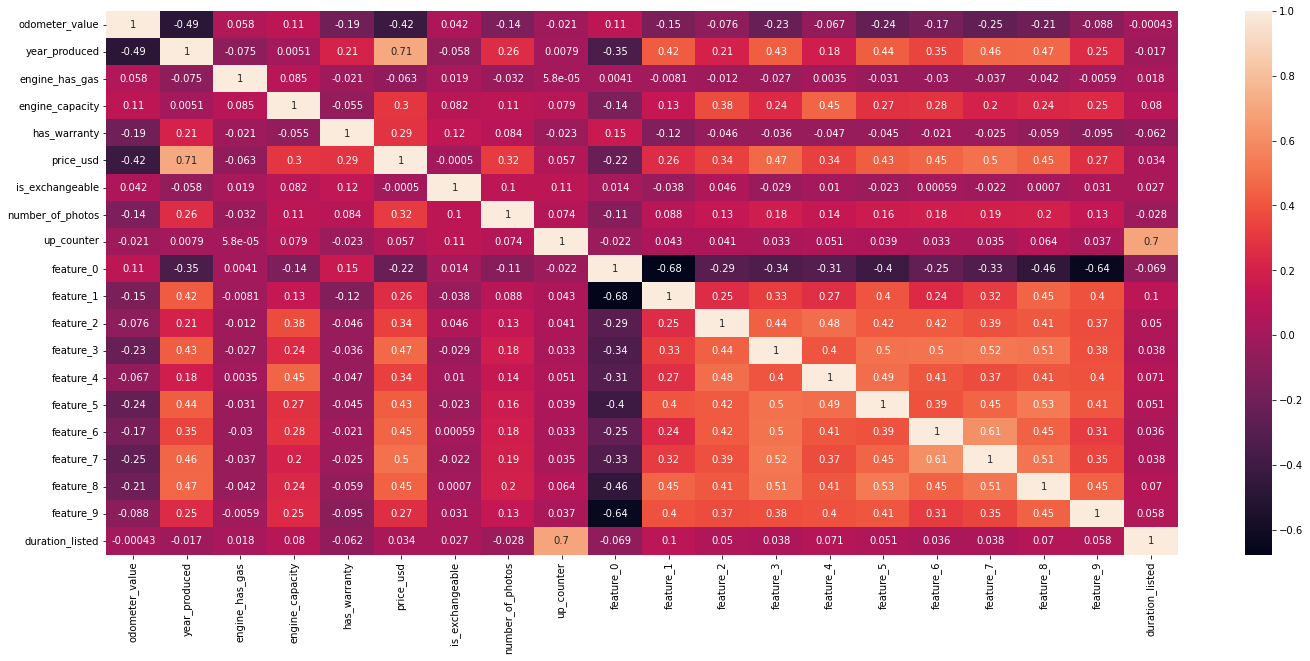

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
corr = data.corr()

sns.heatmap(corr, annot=True)

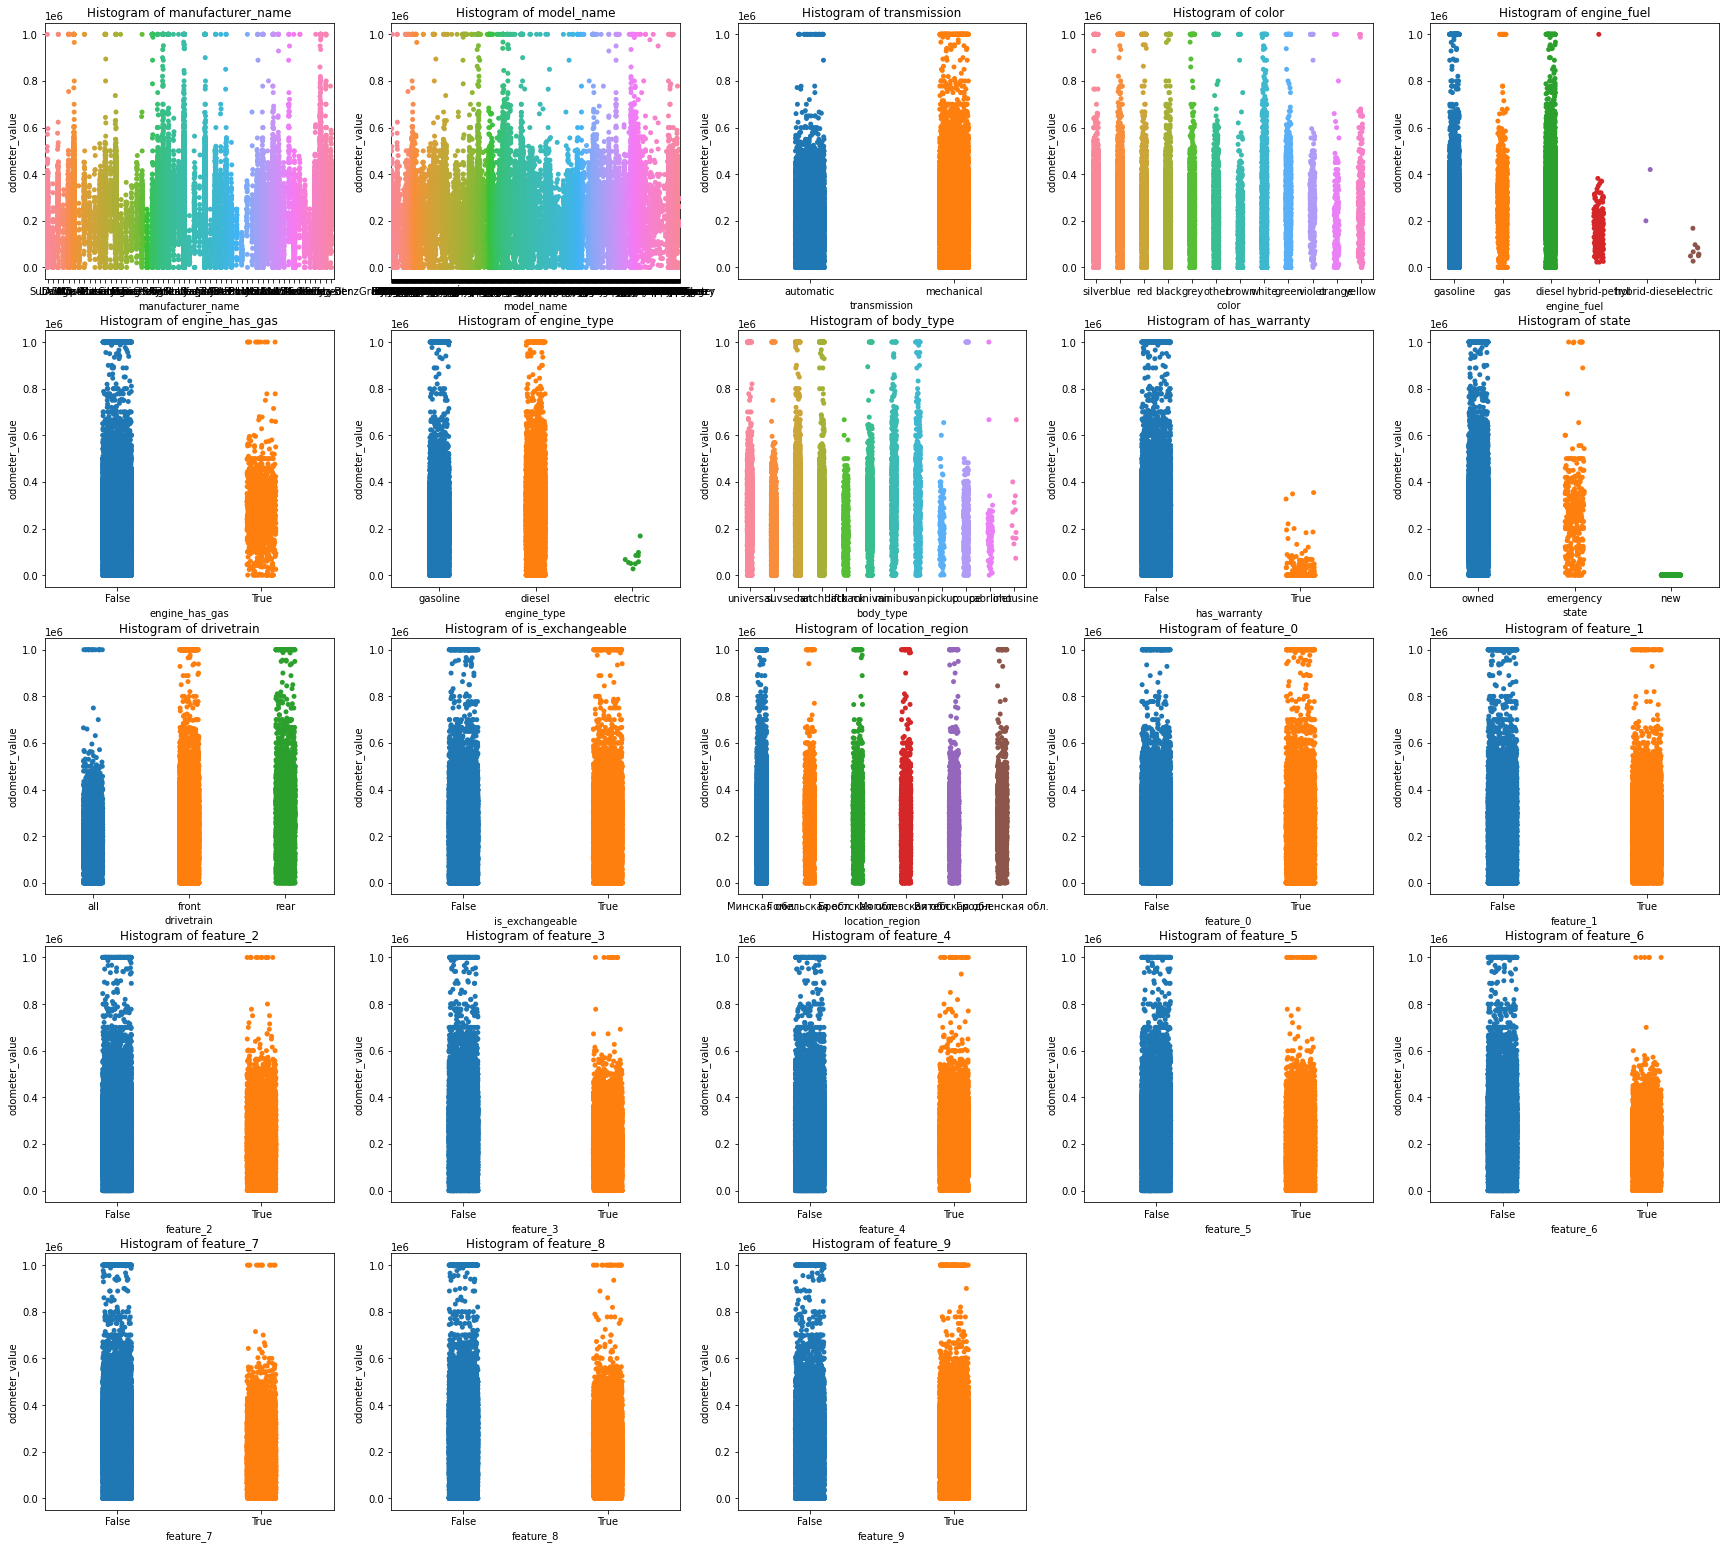

In [ ]:
cat_features = data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()

plt.figure(figsize=(30,50))
col_count = 1

for col in cat_features:
    plt.subplot(9, 5, col_count)
    sns.stripplot(data=data, x=col, y='odometer_value')
    col_count += 1
    plt.title(f'Histogram of {col}')

In [ ]:
relavent_cat_features = ['manufacturer_name', 'model_name', 'transmission']

In [ ]:
columns = ['manufacturer_name', 'year_produced','engine_type', 'transmission', 'engine_capacity', 'odometer_value']
data = data[columns]

data.head()

,manufacturer_name,year_produced,engine_type,transmission,engine_capacity,odometer_value
0,Subaru,2010,gasoline,automatic,2.5,190000
1,Subaru,2002,gasoline,automatic,3.0,290000
2,Subaru,2001,gasoline,automatic,2.5,402000
3,Subaru,1999,gasoline,mechanical,3.0,10000
4,Subaru,2001,gasoline,automatic,2.5,280000


In [ ]:
data.describe()

,year_produced,engine_capacity,odometer_value
count,38531.000000,38521.000000,38531.000000
mean,2002.943734,2.055161,248864.638447
std,8.065731,0.671178,136072.376530
min,1942.000000,0.200000,0.000000
25%,1998.000000,1.600000,158000.000000
50%,2003.000000,2.000000,250000.000000
75%,2009.000000,2.300000,325000.000000
max,2019.000000,8.000000,1000000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   year_produced      38531 non-null  int64  
 2   engine_type        38531 non-null  object 
 3   transmission       38531 non-null  object 
 4   engine_capacity    38521 non-null  float64
 5   odometer_value     38531 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
data = data[data['engine_type'] != 'electric']
data = data[data['odometer_value'] != 1000000]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38359 entries, 0 to 38530
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38359 non-null  object 
 1   year_produced      38359 non-null  int64  
 2   engine_type        38359 non-null  object 
 3   transmission       38359 non-null  object 
 4   engine_capacity    38359 non-null  float64
 5   odometer_value     38359 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
data.head()

,manufacturer_name,year_produced,engine_type,transmission,engine_capacity,odometer_value
0,Subaru,2010,gasoline,automatic,2.5,190000
1,Subaru,2002,gasoline,automatic,3.0,290000
2,Subaru,2001,gasoline,automatic,2.5,402000
3,Subaru,1999,gasoline,mechanical,3.0,10000
4,Subaru,2001,gasoline,automatic,2.5,280000


handle with categorical values and scale numerical

In [ ]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

brands_to_remove = ['ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ']

data = filter_rows_by_values(data, 'manufacturer_name', brands_to_remove)

In [ ]:
columns_to_scale = ['year_produced', 'engine_capacity']
# scaler = StandardScaler()

# data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data['transmission'] = data['transmission'].map({'mechanical': 0, 'automatic': 1})
data['engine_type'] = data['engine_type'].map({'gasoline': 0, 'diesel': 1})

data.head()

,manufacturer_name,year_produced,engine_type,transmission,engine_capacity,odometer_value
0,Subaru,2010,0,1,2.5,190000
1,Subaru,2002,0,1,3.0,290000
2,Subaru,2001,0,1,2.5,402000
3,Subaru,1999,0,0,3.0,10000
4,Subaru,2001,0,1,2.5,280000


In [ ]:
data.describe()

,year_produced,engine_type,transmission,engine_capacity,odometer_value
count,37520.000000,37520.000000,37520.000000,37520.000000,37520.000000
mean,2003.214152,0.341205,0.342910,2.061542,248140.382703
std,7.703434,0.474120,0.474688,0.672923,125987.881232
min,1960.000000,0.000000,0.000000,0.200000,0.000000
25%,1998.000000,0.000000,0.000000,1.600000,160000.000000
50%,2003.000000,0.000000,0.000000,2.000000,250000.000000
75%,2009.000000,1.000000,1.000000,2.300000,325000.000000
max,2019.000000,1.000000,1.000000,7.500000,999999.000000


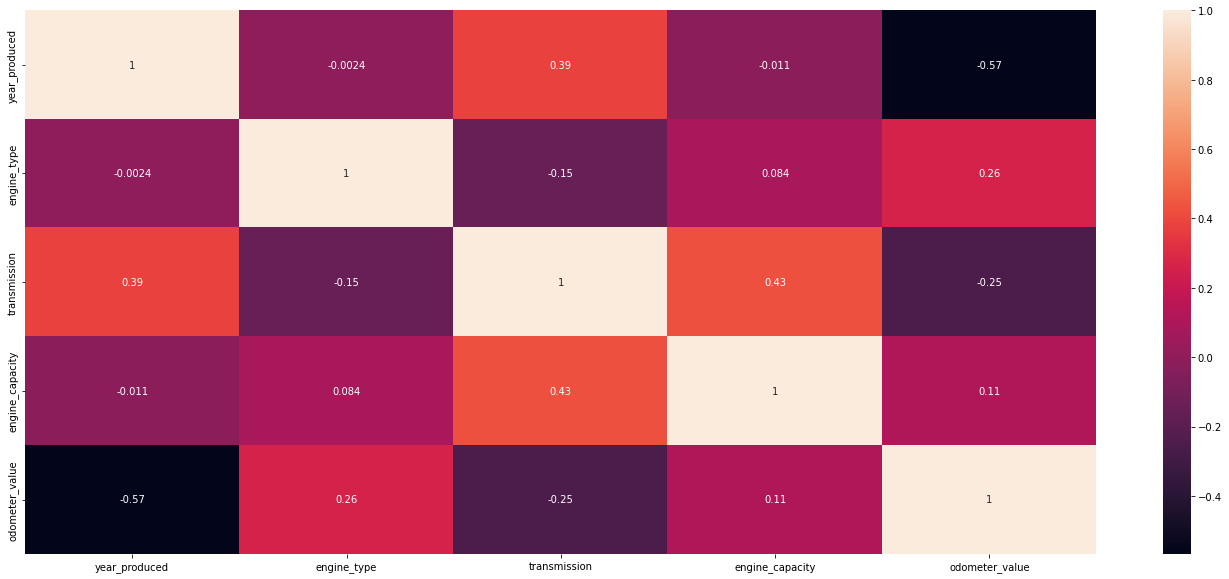

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
corr = data.corr()

sns.heatmap(corr, annot=True)

In [ ]:
dummies = pd.get_dummies(data['manufacturer_name'])

data = pd.concat([data, dummies], axis='columns')
data = data.drop(['manufacturer_name'], axis=1)

In [ ]:
X = data.drop(['odometer_value'], axis=1)
y = data.odometer_value

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28140, 54), (28140,), (9380, 54), (9380,))

In [ ]:
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1., 2.],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [150,200,250], 
                'max_depth': [25,50,75]
            }
        }
    }

    scores = []

    for model_name, model_spec in models.items():
        grid = GridSearchCV(model_spec['model'], model_spec['params'])
        grid.fit(X, y)
        scores.append({
            'model': model_spec['model'],
            'score': grid.best_score_,
            'params': grid.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'score', 'params'])

find_best_model(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,score,params
0,LinearRegression(),0.412332,{'normalize': False}
1,Lasso(),0.412364,"{'alpha': 2.0, 'selection': 'random'}"
2,RandomForestRegressor(),0.403513,"{'max_depth': 25, 'n_estimators': 200}"


In [ ]:
model = Lasso(alpha=2.0, selection='random')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import pickle
with open('/content/drive/MyDrive/ML/Cars/cars.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('/content/drive/MyDrive/ML/Cars/columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [ ]:
values = {
    'engines': ['gasoline', 'diesel']
}

with open('/content/drive/MyDrive/ML/Cars/values.json', 'w') as f:
    f.write(json.dumps(values))

In [ ]:
# with open('/content/drive/MyDrive/ML/Cars/scaler.sav', 'wb') as f:
#     pickle.dump(scaler, f)